## Doğrusal Olmayan Regresyon

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings("ignore")

## KNN

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

## Tahmin

In [6]:
y_pred = knn_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [8]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred =  knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k = ",k, "için RMSE değeri: ", rmse)
    

k =  1 için RMSE değeri:  0.0
k =  2 için RMSE değeri:  179.52761335480352
k =  3 için RMSE değeri:  205.20157172291863
k =  4 için RMSE değeri:  220.5139794876305
k =  5 için RMSE değeri:  239.6467132541376
k =  6 için RMSE değeri:  243.5904190007242
k =  7 için RMSE değeri:  258.1478781634636
k =  8 için RMSE değeri:  266.05374203349805
k =  9 için RMSE değeri:  269.73782093553376
k =  10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
knn_params = {"n_neighbors" : np.arange(1,30,1)}

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [13]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [14]:
knn_cv_model.best_params_["n_neighbors"]

8

In [15]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [16]:
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_["n_neighbors"])

In [17]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [18]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test)))

413.7094731463598

## SVR (Support vector regression)

In [19]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=42)

In [20]:
X_train = pd.DataFrame(X_train["Hits"]).values
X_test = pd.DataFrame(X_test["Hits"]).values

In [21]:
from sklearn.svm import SVR

In [22]:
svr_model = SVR(kernel='linear').fit(X_train,y_train)

In [23]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [24]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [25]:
y_pred = svr_model.predict(X_train)

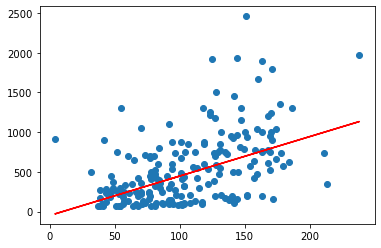

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred, color="r")

In [27]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


Text(0, 0.5, 'Maaş(Salary)')

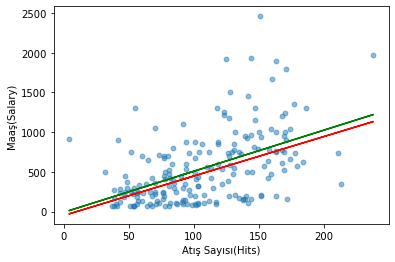

In [28]:
plt.scatter(X_train,y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, "g")
plt.plot(X_train, y_pred, color="r")

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

## Tahmin

In [29]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [30]:
svr_model.predict([[91]])

array([403.52804878])

In [31]:
y_pred = svr_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

## Model Tuning

In [33]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [34]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [35]:
svr_tuned = SVR(kernel = "linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [36]:
y_pred = svr_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

## Doğrusal Olmayan SVR

In [38]:
np.random.seed(3)

x_sim = np.random.uniform(2,10,145)
y_sim = np.sin(x_sim) + np.random.normal(0,0.4,145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [39]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel = "rbf", epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

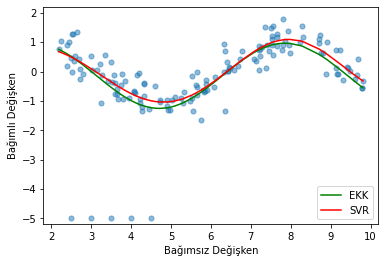

In [40]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, "g")
plt_svr, = plt.plot(x_sim, svr_pred, color="r")
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr],["EKK", "SVR"], loc = 4);

In [41]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=42)

In [42]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

## Tahmin

In [43]:
y_pred = svr_rbf.predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [45]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [46]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [47]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [48]:
y_pred =svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

## Artificial Neural Network(yapay sinir ağları-çok katmanlı algılayıcılar)

In [49]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
X_train_scaled = scaler.transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.neural_network import MLPRegressor

In [55]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [56]:
mlp_model

MLPRegressor()

In [57]:
mlp_model.n_layers_

3

In [58]:
mlp_model.hidden_layer_sizes

(100,)

## Tahmin

In [59]:
mlp_model.predict(X_test_scaled)[0:5]

array([23.49570976, 41.31406854, 71.96314134, 13.90410431, 14.51662052])

In [60]:
y_pred = mlp_model.predict(X_test_scaled)

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

661.176316569889

## Model Tuning

In [62]:
mlp_model

MLPRegressor()

In [63]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
              "hidden_layer_sizes": [(20,20),(100,50,150),(300,200,150)],
              "activation": ["relu","logistic"]}

In [64]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)

In [65]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [66]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [67]:
mlp_tuned = MLPRegressor(alpha=0.02, hidden_layer_sizes = (100,50,150))

In [68]:
mlp_tuned.fit(X_train_scaled,y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [69]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.3321715382337

## Classification and Regression Tree - CART

In [71]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [72]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [73]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [74]:
cart_model

DecisionTreeRegressor()

In [75]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

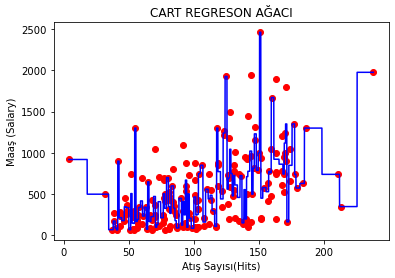

In [76]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [77]:
!pip install skompiler

In [78]:
!pip install astor

In [79]:
from skompiler import skompile

In [80]:
print(skompile(cart_model.predict).to("python/code"))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

## Tahmin

In [81]:
x = [91]

In [82]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [83]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [84]:
cart_model.predict([[91]])

array([125.])

In [85]:
y_pred = cart_model.predict(X_test)

In [86]:
y_test

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
       ...  
122    400.0
282     90.0
111    385.0
232    450.0
51      70.0
Name: Salary, Length: 66, dtype: float64

In [87]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

## Model Tuning

In [88]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [90]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [91]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [92]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [93]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [94]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [95]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [96]:
y_pred = cart_tuned.predict(X_test)

In [97]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

## Baged Tree Regression

In [98]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [99]:
bag_model = BaggingRegressor(bootstrap_features= True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [100]:
bag_model.n_estimators

10

In [101]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1414608017),
 DecisionTreeRegressor(random_state=1676707865),
 DecisionTreeRegressor(random_state=1626346850),
 DecisionTreeRegressor(random_state=1282159090),
 DecisionTreeRegressor(random_state=233926433),
 DecisionTreeRegressor(random_state=1269620032),
 DecisionTreeRegressor(random_state=1369313598),
 DecisionTreeRegressor(random_state=522669567),
 DecisionTreeRegressor(random_state=1611401697),
 DecisionTreeRegressor(random_state=1699283917)]

In [102]:
bag_model.estimators_samples_

[array([  8,  34, 156,  37,  38, 148, 141, 151,  87, 189, 149,  76, 173,
         93,  29,  41, 166, 106,  17, 159, 156,  18,  88,  46,  60, 158,
        128, 112, 157,  50,  36, 108,  51, 145,   8, 124, 184, 112,  22,
         12, 125,  64, 146, 179,  81,   6, 172, 182, 159, 166, 176, 187,
        122,  10, 106, 149,  96,  79,  49, 152, 139,   2, 140,  91, 174,
         75, 132,  26, 185, 192, 194, 192, 133,  46, 152,  43, 148, 147,
         95, 152, 142, 157,  94,  53,  66, 132,  12, 179, 100, 101, 130,
         49,  67,   0, 126,  62,   7, 111,   3,  10, 123,   5, 196, 114,
         46, 113,  82,  52, 128, 124, 195,  90,  24, 188, 152, 181,  17,
        123,  10,  36, 150,  41, 116,  74,  82,  69,  32, 160,  37,  90,
         45,  21, 152, 128,  15,  75, 143, 174,  89, 127, 195,  63,  57,
        189, 174, 129, 143,  33,  41,  68,  82, 154, 123,  72,  39, 133,
         77, 189, 122,  10, 165, 186, 174,  85, 131, 163, 168,  64,  46,
        136, 138, 133,  54, 144, 192,  57,  94, 133

In [103]:
bag_model.estimators_features_

[array([17,  4,  5, 17,  7, 10,  5,  4,  4, 15, 17,  7,  0,  8,  0, 18, 17,
         5,  2]),
 array([ 4,  2,  9,  5,  1,  5,  5, 17,  5,  1,  0, 18, 16, 16,  6, 14, 17,
         6,  5]),
 array([ 2,  6,  0, 11,  9,  0,  2, 14, 13,  5,  0, 13,  6,  9,  9,  0,  4,
         5, 14]),
 array([18, 13, 16, 15,  7,  5, 17, 10,  9,  2, 11,  3,  7, 16,  8,  3,  1,
         3, 11]),
 array([ 1, 11, 12,  9, 18, 13, 10,  3,  7, 11, 14,  6, 17,  3, 15, 17, 18,
         2, 13]),
 array([ 0,  5,  1,  5,  8, 18,  5,  0, 11, 18,  0,  1, 14,  5, 17, 14, 12,
         2,  0]),
 array([13, 10,  0, 10,  6,  0,  2,  9, 12, 13, 16,  1,  5, 16, 14,  9, 12,
        10, 18]),
 array([ 3,  1,  9,  9,  2,  5,  9,  5,  6, 14,  6,  8, 18,  2,  7,  8, 15,
         4, 13]),
 array([ 1, 16,  3,  9, 15, 10, 10,  3, 13,  5,  2,  0, 18, 17,  7,  8,  9,
         3,  3]),
 array([13, 12, 14, 12,  7,  3, 18,  5, 15,  5,  5,  2, 17, 16,  8, 15,  5,
        16, 14])]

In [104]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1676707865)

 ## Tahmin

In [105]:
y_pred = bag_model.predict(X_test)

In [106]:
np.sqrt(mean_squared_error(y_test,y_pred))

352.6602256011514

In [107]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

460.2683142752088

In [109]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [110]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

521.0227390949022

## Model Tuning

In [111]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [112]:
bag_params={"n_estimators":range(2,20)}

In [113]:
bag_cv_model = GridSearchCV(bag_model,bag_params, cv=10)

In [114]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [115]:
bag_cv_model.best_params_

{'n_estimators': 15}

In [116]:
bag_tuned = BaggingRegressor(n_estimators=10, random_state=45)

In [117]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(random_state=45)

In [118]:
y_pred = bag_tuned.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test,y_pred))

343.7299462017933

## Random Forests

In [120]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf_model = RandomForestRegressor(random_state=42)

In [123]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [124]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [125]:
y_pred = rf_model.predict(X_test)

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

## Model Tuning

In [127]:
rf_params = {"max_depth": list(range(1,10)),
             "max_features":[3,5,10,15],
             "n_estimators" : [100,200,500,1000,2000]}

In [128]:
rf_model = RandomForestRegressor(random_state=42)

In [129]:
rf_cv_model = GridSearchCV(rf_model,rf_params, cv=10, n_jobs=-1)

In [130]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [131]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [132]:
rf_tuned = RandomForestRegressor(max_depth = 8,max_features=3, n_estimators =200)

In [133]:
rf_tuned = rf_tuned.fit(X_train,y_train)

In [134]:
y_pred = rf_tuned.predict(X_test)

In [135]:
np.sqrt(mean_squared_error(y_test,y_pred))

341.1445457733539

In [136]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

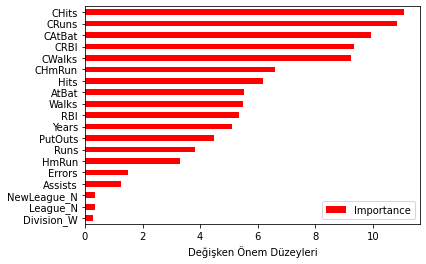

In [137]:
Importance.sort_values(by = "Importance",axis=0, ascending= True).plot(kind="barh",color="r")

plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Boosting Machines

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [140]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.8709594205062

## Model Tuning

In [141]:
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1, 0.2],
    "max_depth" : [3,5,8,50,100],
    "n_estimators" : [200,500,1000,2000],
    "subsample": [1, 0.5, 0.75]}

In [142]:
gbm= GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs= -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [143]:
gbm_cv_model.best_params_    

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 2000, 'subsample': 0.5}

In [144]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                      max_depth= 5,
                                      n_estimators= 200,
                                      subsample=0.5)
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [145]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

332.39381049237966

In [146]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

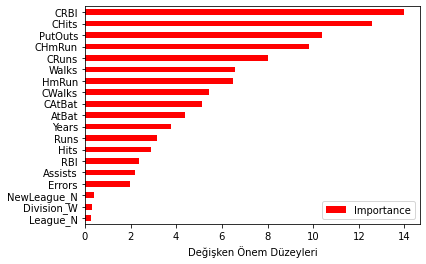

In [147]:
Importance.sort_values(by = "Importance",axis=0, ascending= True).plot(kind="barh",color="r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBoost

In [148]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [149]:
#pip install xgboost

In [150]:
import xgboost as xgb

In [151]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

In [152]:
from xgboost import XGBRegressor

In [153]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [154]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

## Model Tuning

In [155]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [156]:
xgb_grid = {
    "colsample_bytree":[0.4, 0.5,0.6,0.9,1],
    "learning_rate": [0.01, 0.1,0.5],
    "max_depth" : [2,3,4,5,6],
    "n_estimators" : [2100,200,500,1000],
    }

In [157]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb,param_grid=xgb_grid, cv=10, n_jobs=-1, verbose=2)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estima

In [158]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [159]:
xgb_tuned = XGBRegressor(colsample_bytree=0.9,learning_rate=0.1, max_depth=2, n_estimators=1000)

xgb_tuned = xgb_tuned.fit(X_train, y_train)

In [160]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.1112418462617

## LightGBM

In [161]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [162]:
#pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 1.3/1.3 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [163]:
from lightgbm import LGBMRegressor

In [171]:
lgbm = LGBMRegressor(verbose=-1)
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [172]:
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration_)

In [173]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [174]:
lgbm_model

LGBMRegressor(verbose=-1)

In [177]:
lgbm_grid = {
    "colsample_bytree":[0.4, 0.5,0.6,0.9,1],
    "learning_rate": [0.01, 0.1,0.5,1],
    "max_depth" : [1,2,3,4,5,6,7,8],
    "n_estimators" : [20,40,100,200,500,1000],
    }
lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm,lgbm_grid, cv=10, n_jobs=-1, verbose=2)

In [178]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [179]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [181]:
lgbm_tuned = LGBMRegressor(learning_rate=0.1,max_depth=7, n_estimators=40, colsample_bytree=0.6,verbose=-1)

lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

In [182]:
y_pred = lgbm_tuned.predict(X_test)

In [183]:
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

## CatBoost( Category Boosting)

In [184]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [185]:
! pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0c/cd/a05bbb220e9b45b4cadcb22d5e801aeece7b301f5775d78e13972d0f60cf/catboost-1.2.2-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 101.0/101.0 MB 5.3 MB/s eta 0:00:00


In [186]:
from catboost import CatBoostRegressor

In [187]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 142ms	remaining: 2m 21s
1:	learn: 431.3923642	total: 146ms	remaining: 1m 12s
2:	learn: 424.8820360	total: 149ms	remaining: 49.5s
3:	learn: 418.2514904	total: 152ms	remaining: 37.9s
4:	learn: 412.6394021	total: 156ms	remaining: 31s
5:	learn: 406.6247020	total: 159ms	remaining: 26.3s
6:	learn: 400.5321206	total: 162ms	remaining: 22.9s
7:	learn: 394.6683437	total: 164ms	remaining: 20.3s
8:	learn: 388.2496484	total: 166ms	remaining: 18.3s
9:	learn: 382.9448842	total: 168ms	remaining: 16.6s
10:	learn: 377.2600080	total: 170ms	remaining: 15.2s
11:	learn: 372.4829606	total: 171ms	remaining: 14.1s
12:	learn: 366.6823437	total: 173ms	remaining: 13.1s
13:	learn: 362.6076230	total: 175ms	remaining: 12.3s
14:	learn: 358.0107745	total: 177ms	remaining: 11.6s
15:	learn: 353.2802665	total: 179ms	remaining: 11s
16:	learn: 348.5646265	total: 180ms	remaining: 10.4s
17:	learn: 343.6407912	total: 182ms	remaining: 9.9s
18:	learn: 339.2363847	total:

## Tahmin

In [188]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [189]:
catb_grid = {
    "iterations":[200,500,1000,2000],
    "learning_rate": [0.01, 0.03,0.05,0.1],
    "depth" : [3,4,5,6,7,8]}
    

In [190]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb,catb_grid, cv=5, n_jobs=-1, verbose=2)

In [191]:
catb_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned =CatBoostRegressor(iterations=200, learning_rate = 0.01, depth=8)

catb_tuned = catb_tuned.fit(X_train, y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))